In [37]:
import numpy as np
from numpy.random import default_rng

# Updated model parameters
alpha = 0.5      # Output elasticity of capital in Cobb-Douglas function
delta = 0        # Depreciation rate of capital
beta = -1        # Discount factor
sigma = 1.0      # CRRA utility parameter
time_steps = 30  # Number of time steps
k_initial = 0.05 # Initial capital
dt = 0.1         # Real-time scale of a step

# Pre-compute discount factor's exponential terms
discount_factors = np.exp(beta * np.arange(time_steps))

# Utility function
def utility(c):
    return np.where(c > 0, np.log(c), -np.inf)

# Production function
def production(k):
    return k ** alpha

# Function to calculate utility of a path
def calculate_utility(path):
    current_k = k_initial
    k_values = np.zeros(time_steps)

    for i in range(time_steps):
        k_values[i] = current_k
        current_k = production(current_k) * dt - path[i] * dt + (1 - delta * dt) * current_k
        if current_k <= 0:
            return -np.inf, k_values

    total_utility = np.sum(discount_factors * utility(path))
    return total_utility, k_values

def feasible_initial_sampling(time_steps, initial_k, dt, delta, rng):
    path = np.zeros(time_steps)
    k = initial_k

    for i in range(time_steps):
        production_output = production(k) * dt
        max_possible_consumption = production_output + (1 - delta * dt) * k
        # Sample within a range that is likely to be feasible
        min_consumption = 0
        max_consumption = max_possible_consumption
        path[i] = rng.uniform(min_consumption, max_consumption)
        k = production(k) * dt - path[i] * dt + (1 - delta * dt) * k

    return path

def guided_random_walk(time_steps, initial_k, dt, delta, rng):
    path = np.zeros(time_steps)
    k = initial_k

    for i in range(time_steps):
        production_output = production(k) * dt
        max_possible_consumption = production_output + (1 - delta * dt) * k
        # Determine a reasonable range for consumption
        min_consumption = 0
        max_consumption = max_possible_consumption
        # Guide the walk: favor consumption values that keep the capital level stable
        mean_consumption = (min_consumption + max_consumption) / 2
        path[i] = rng.normal(mean_consumption, (max_consumption - min_consumption) / 6)
        path[i] = max(min(path[i], max_consumption), min_consumption)
        k = production(k) * dt - path[i] * dt + (1 - delta * dt) * k

    return path

def guided_random_walk_consumption(time_steps, initial_k, dt, delta, rng):
    path = np.zeros(time_steps)
    k = initial_k

    for i in range(time_steps):
        production_output = production(k) * dt
        max_possible_consumption = production_output + (1 - delta * dt) * k
        # Guide the walk: favor consumption values that keep the capital level stable
        mean_consumption = (max_possible_consumption) / 2
        path[i] = rng.normal(mean_consumption, (max_possible_consumption) / 6)
        path[i] = max(min(path[i], max_possible_consumption), 0)
        # Update capital
        k = production(k) * dt - path[i] * dt + (1 - delta * dt) * k
        # Check for negative capital and adjust if necessary
        if k < 0:
            path[i] += k  # Adjust consumption to avoid negative capital
            k = 0

    return path



def main():
    rng = default_rng()
    best_utility = -np.inf
    best_path = np.zeros(time_steps)
    k_values = np.zeros(time_steps)

    num_samples = 10000  # Number of random samples

    for _ in range(num_samples):
        current_path = guided_random_walk_consumption(time_steps, initial_k, dt, delta, rng)
        current_utility, current_k_values = calculate_utility(current_path)

        if current_utility > best_utility:
            best_utility = current_utility
            best_path = current_path
            k_values = current_k_values

    print("Best consumption sequence:", best_path)
    print("Corresponding k values:", k_values)
    print("Utility:", best_utility)

if __name__ == "__main__":
    main()


NameError: name 'initial_k' is not defined

In [358]:
import numpy as np
from numpy.random import default_rng

# Updated model parameters
alpha = 0.5      # Output elasticity of capital in Cobb-Douglas function
delta = 0        # Depreciation rate of capital
beta = -1        # Discount factor
sigma = 1.0      # CRRA utility parameter
time_steps = 100  # Number of time steps
k_initial = 0.05 # Initial capital
dt = 0.1         # Real-time scale of a step

# Pre-compute discount factor's exponential terms
discount_factors = np.exp(beta * np.arange(time_steps))

# Utility function
def utility(c):
    return np.where(c <= 0, -np.inf, np.log(c))

# Production function
def production(k):
    return k ** alpha

# Function to calculate utility of a path and check budget constraint
def calculate_utility_and_check_budget(path):
    current_k = k_initial
    k_values = np.zeros(time_steps)

    for i in range(time_steps):
        production_output = production(current_k)
        next_k = production_output * dt - path[i] * dt + (1 - delta * dt) * current_k
        k_values[i] = next_k

        if next_k < 0 or path[i] > production_output:
            # Budget constraint violated
            return -np.inf, k_values

        current_k = next_k

    total_utility = np.sum(discount_factors * utility(path))
    return total_utility, k_values

def main():
    rng = default_rng()
    best_utility = -np.inf
    best_path = np.zeros(time_steps)

    num_samples = 100000  # Number of random samples

    for _ in range(num_samples):
        # Generate random consumption paths
        current_path = rng.uniform(0, 2, time_steps)
        current_utility, current_k_values = calculate_utility_and_check_budget(current_path)

        if current_utility > best_utility:
            best_utility = current_utility
            best_path = current_path

    print("Best consumption sequence:", best_path)
    print("Utility:", best_utility)
    print("Utility:", best_utility)

if __name__ == "__main__":
    main()


Best consumption sequence: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
Utility: -inf
Utility: -inf


In [290]:
import numpy as np
from numpy.random import default_rng

# Model parameters
alpha = 0.5      # Output elasticity of capital in Cobb-Douglas function
delta = 0        # Depreciation rate of capital
beta = -1        # Discount factor
time_steps = 50  # Number of time steps
k_initial = 0.05 # Initial capital
dt = 0.1         # Real-time scale of a step

# Pre-compute discount factor's exponential terms
discount_factors = np.exp(beta * np.arange(time_steps) * dt)

# Utility function - vectorized
def utility(c):
    return np.log(np.maximum(1e-8,c))

# Production function
def production(k):
    return k ** alpha

# Budget constraint check function
def is_feasible(consumption, k_initial):
    k = k_initial
    for c in consumption:
        k_prod = production(k)
        if c * dt > k_prod * dt + (1 - delta * dt) * k:
            return False
        k = k_prod * dt - c * dt + (1 - delta * dt) * k
    return True

def calculate_utility(consumption):
    return np.sum(discount_factors * utility(consumption))

def guided_random_walk(current_path, rng, step_size=0.01):
    # Apply a small random change to the current path
    return current_path + rng.uniform(-step_size, step_size, current_path.shape)

def main():
    rng = default_rng()
    best_utility = -np.inf
    best_consumption = np.zeros(time_steps)

    # Generate initial path using skewed distribution (Beta distribution)
    current_consumption = rng.normal(0.6, 0.01, size=time_steps)#0.05 + (rng.beta(a=2, b=5, size=time_steps) - 2/7)  # Scale appropriately
    
    num_iterations = 1000  # Number of iterations for guided random walks

    for _ in range(num_iterations):
        if is_feasible(current_consumption, k_initial):
            current_utility = calculate_utility(current_consumption)
            if current_utility > best_utility:
                best_utility = current_utility
                best_consumption = current_consumption.copy()

        # Apply guided random walk to the current best path
        current_consumption = guided_random_walk(best_consumption, rng)

    print("Best consumption sequence:", best_consumption)
    print("Utility:", best_utility)

if __name__ == "__main__":
    main()


Best consumption sequence: [ 0.26247056  0.20220628  0.18162688  0.22767317  0.2967218   0.27250497
  0.24716436  0.17161237  0.2288619   0.17369259  0.13913154  0.14289833
  0.23598126  0.16758691  0.14150512  0.14601418  0.1606543   0.17743966
  0.13304701 -0.06898784  0.09486636  0.10484431  0.10380647  0.1405065
  0.11604134  0.05397963  0.10968917  0.0587      0.05407856  0.08896699
 -0.07746438 -0.16309683  0.06253928  0.14408498  0.24401989  0.02714753
  0.13396973 -0.09920703  0.04954179  0.16792624  0.02504145  0.03063424
  0.01813477  0.06231279  0.05455658  0.11163472  0.0293659   0.07754808
  0.03671475  0.08195878]
Utility: -22.108192749117002


(array([1016., 2066., 2137., 1863., 1332.,  884.,  444.,  182.,   62.,
          14.]),
 array([0.00385868, 0.0936795 , 0.18350031, 0.27332113, 0.36314195,
        0.45296276, 0.54278358, 0.63260439, 0.72242521, 0.81224603,
        0.90206684]),
 <BarContainer object of 10 artists>)

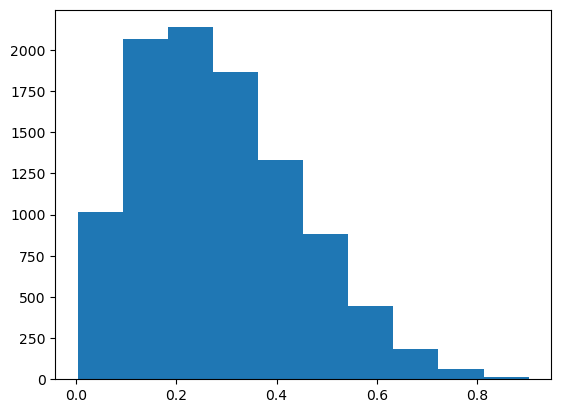

In [119]:
rng = default_rng()
import matplotlib.pyplot as plt 

plt.hist(rng.beta(a=2, b=5, size=10000))  

In [330]:
import numpy as np
from numpy.random import default_rng

class OptimalConsumptionModel:
    def __init__(self, alpha = 0.5, delta = 0, beta = -1, time_steps = 50, k_initial = 0.05, dt = 0.1):
        self.alpha = alpha
        self.delta = delta
        self.beta = beta
        self.time_steps = time_steps
        self.k_initial = k_initial
        self.dt = dt
        self.discount_factors = np.exp(self.beta * np.arange(self.time_steps) * self.dt)
    
    def utility(self, c):
        return np.log(np.maximum(1e-8, c))

    def production(self, k):
        return k ** self.alpha

    def is_feasible(self, consumption):
        k = self.k_initial
        for c in consumption:
            k_prod = self.production(k)
            if c * self.dt > k_prod * self.dt + (1 - self.delta * self.dt) * k:
                return False
            k = k_prod * self.dt - c * self.dt + (1 - self.delta * self.dt) * k
        return True

    def calculate_utility(self, consumption):
        return np.sum(self.discount_factors * self.utility(consumption))

    def guided_random_walk(self, current_path, rng, step_size=0.01):
        return current_path + rng.uniform(-step_size, step_size, current_path.shape)

    def find_optimal_consumption(self, num_iterations=10000):
        rng = default_rng()
        best_utility = -np.inf
        best_consumption = np.zeros(self.time_steps)

        # Generate initial path using skewed distribution (Beta distribution)
        current_consumption = rng.uniform(-0.05, 1, size=self.time_steps)

        for _ in range(num_iterations):
            if self.is_feasible(current_consumption):
                current_utility = self.calculate_utility(current_consumption)
                if current_utility > best_utility:
                    best_utility = current_utility
                    best_consumption = current_consumption.copy()

            # Apply guided random walk to the current best path
            current_consumption = self.guided_random_walk(best_consumption, rng)

        return best_consumption, best_utility



In [334]:
alpha = 0.5
delta = 0
beta = -1
time_steps = 200
k_initial = 0.1
dt = 0.1

model = OptimalConsumptionModel(alpha, delta, beta, time_steps, k_initial, dt)
optimal_consumption, utility = model.find_optimal_consumption()

print("Best consumption sequence:", optimal_consumption)
print("Utility:", utility)

Best consumption sequence: [ 0.25342589  0.27121709  0.26614985  0.29592649  0.30972663  0.32595981
  0.33283871  0.34716017  0.35118765  0.31851778  0.33488921  0.38865194
  0.36897218  0.40015545  0.36019948  0.39830339  0.43664078  0.41460375
  0.44980503  0.33616245  0.39972375  0.48810742  0.34335368  0.38881521
  0.41127099  0.38857352  0.38689746  0.38409168  0.38729686  0.3095852
  0.47519842 -0.17885647  0.35105322  0.28151423  0.24139351  0.28032195
  0.28560722  0.31532734  0.21437431  0.26144135  0.26736321  0.1358002
  0.18414669 -0.11879202  0.2567892   0.31100562  0.23321009 -0.06554992
  0.218359    0.09552927 -0.10258784 -0.17745962  0.09584465  0.17950661
  0.19612596  0.15233564  0.05845843  0.11013383 -0.26114681  0.31389437
  0.08412496 -0.21526879 -0.14419743  0.25847698  0.02538902 -0.21626569
  0.13703617  0.1466838   0.14405424  0.25863548  0.08047297  0.2508995
  0.05547885 -0.15506813 -0.19876471  0.03902905 -0.09438976 -0.18685557
  0.03266733  0.01381316  0

In [301]:
deltaT_max = 100
c = np.zeros(deltaT_max)
u = np.zeros(deltaT_max)
k = np.zeros(deltaT_max)

for deltaT in np.arange(1,deltaT_max):
    model = OptimalConsumptionModel(time_steps=deltaT)
    optimal_consumption, utility = model.find_optimal_consumption()
    c[deltaT] = optimal_consumption[0]
    u[deltaT] = utility

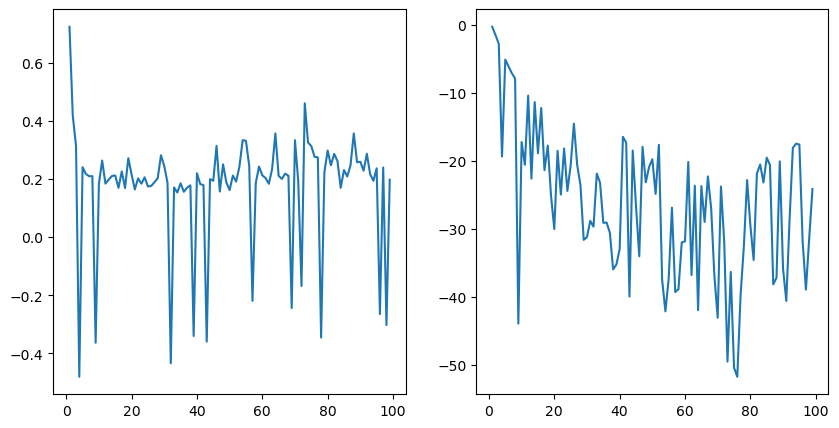

In [302]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(np.arange(1, deltaT_max), c[1:])
ax[1].plot(np.arange(1, deltaT_max), u[1:])